In [3]:
#!pip install nltk
#!pip install tensorflow
#!pip install keras
import sklearn as sk
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords
import string
import nltk
import tensorflow
from sklearn.model_selection import train_test_split
from collections import Counter
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from pandas import DataFrame
from matplotlib import pyplot

In [4]:
#C:\Users\sriku\OneDrive\Desktop\503_Devon

nltk.download('stopwords')

AAPL_ts = pd.read_csv(r"AAPL.csv")

DJI_ts = pd.read_csv(r"DJI.csv")

MSFT_ts = pd.read_csv(r"MSFT.csv")

MSFT_news = pd.read_csv(r"MicrosoftNewsStock.csv")

AAPL_news = pd.read_csv(r"AppleNewsStock.csv")


AAPL_news['Change'] = AAPL_news.loc[:,'Adj Close'] - AAPL_news.loc[:,'Open'] # difference between open and close price

print(AAPL_news.shape) # check the shape with the nans

AAPL_news = AAPL_news.dropna()

print(AAPL_news.shape) #check the dataframe with nans removed

df = AAPL_news[['News','Change']]

negative_text = df[df['Change']<0] # negative change from bad news (likely)
#
positive_text = df[df['Change']>=0] # positive change from good news (likely)

print(negative_text.shape)
print(positive_text.shape)



(2517, 9)
(2323, 9)
(1147, 2)
(1176, 2)


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
X_train, X_test, y_train, y_test = train_test_split(df['News'], df['Change'], test_size=0.2, random_state=0)
#
# train_set_negative = negative_text.loc[0:0.7*len(negative_text),:]
#
# train_set_positive = positive_text.loc[0:0.7*len(positive_text),:]
#
# test_set_negative = negative_text.loc[0.7*len(negative_text)+1:len(negative_text),:]
#
# test_set_positive = positive_text.loc[0.7*len(positive_text)+1:len(positive_text),:]
#
# training_set = pd.concat([train_set_negative, train_set_positive], axis = 0)
#
# training_set = training_set.reset_index(drop = True)
#
# testing_set = pd.concat([test_set_negative, test_set_positive], axis = 0)
#
# testing_set = testing_set.reset_index(drop = True)

# function that cleans the News article
def clean_doc(doc):
    # split into tokens by white space
    tokens =[]
    for i, News in doc.iterrows():
            token = doc.loc[i,'News']
            token = token.split()
            tokens = token+tokens
        #remove punctuation from each token
            table = str.maketrans('', '', string.punctuation)
            tokens = [w.translate(table) for w in tokens]
             # remove remaining tokens that are not alphabetic
            tokens = [word for word in tokens if word.isalpha()]
             # filter out stop words
            stop_words = set(stopwords.words('english'))
            tokens = [w for w in tokens if not w in stop_words]
            # filter out short tokens
            tokens = [word for word in tokens if len(word) > 1]
    return tokens



X_train = X_train.to_frame().reset_index()
y_train = y_train.to_frame().reset_index().apply(lambda x: np.sign(x))
X_test = X_test.to_frame().reset_index()
y_test = y_test.to_frame().reset_index().apply(lambda x: np.sign(x))



#print(X_train)
# training_set.shape
tokens = clean_doc(X_train)

print(tokens)

vocab = Counter()
vocab.update(tokens)
#print(vocab.most_common(50))

# ytrain = training_set['score']
# ytrain = ytrain.to_numpy()
# ytrain[ytrain >= 0] = 1
# ytrain[ytrain < 0] = 0
#
# # Xtest = training_set['title']
# ytest = testing_set['score'].to_numpy()
# ytest[ytest >= 0] = 1
# ytest[ytest < 0] = 0




IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [34]:
print(y_train)
y_train = y_train['Change'].to_numpy()
y_test = y_test['Change'].to_numpy()    
#print(y_test)

[ 1.  1.  1. ... -1. -1. -1.]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [35]:
def evaluate_mode(Xtrain, ytrain, Xtest, ytest):
    scores = list()
    n_repeats = 10
    n_words = Xtest.shape[1]
    for i in range(n_repeats):
        # define network
        model = Sequential()
        model.add(Dense(50, input_shape=(n_words,), activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        # compile network
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        # fit network
        model.fit(Xtrain, ytrain, epochs=50, verbose=2)
        # evaluate
        loss, acc = model.evaluate(Xtest, ytest, verbose=0)
        scores.append(acc)
        print('%d accuracy: %s' % ((i + 1), acc))
    return scores


def prepare_data(train_docs, test_docs, mode):
    # create the tokenizer
    tokenizer = Tokenizer()
    # fit the tokenizer on the documents
    tokenizer.fit_on_texts(train_docs)
    # encode training data set
    Xtrain = tokenizer.texts_to_matrix(train_docs, mode=mode)
    # encode training data set
    Xtest = tokenizer.texts_to_matrix(test_docs, mode=mode)
    return Xtrain, Xtest




[1. 1. 1. ... 0. 0. 0.]
Epoch 1/50
59/59 - 3s - loss: 0.7020 - accuracy: 0.4839
Epoch 2/50
59/59 - 3s - loss: 0.4779 - accuracy: 0.8509
Epoch 3/50
59/59 - 4s - loss: 0.2184 - accuracy: 0.9365
Epoch 4/50
59/59 - 5s - loss: 0.0764 - accuracy: 0.9860
Epoch 5/50
59/59 - 4s - loss: 0.0325 - accuracy: 0.9968
Epoch 6/50
59/59 - 3s - loss: 0.0165 - accuracy: 0.9989
Epoch 7/50
59/59 - 3s - loss: 0.0098 - accuracy: 0.9989
Epoch 8/50
59/59 - 2s - loss: 0.0062 - accuracy: 1.0000
Epoch 9/50
59/59 - 4s - loss: 0.0047 - accuracy: 0.9995
Epoch 10/50
59/59 - 3s - loss: 0.0031 - accuracy: 1.0000
Epoch 11/50
59/59 - 3s - loss: 0.0022 - accuracy: 1.0000
Epoch 12/50
59/59 - 3s - loss: 0.0018 - accuracy: 1.0000
Epoch 13/50
59/59 - 3s - loss: 0.0015 - accuracy: 1.0000
Epoch 14/50
59/59 - 2s - loss: 0.0012 - accuracy: 1.0000
Epoch 15/50
59/59 - 2s - loss: 0.0010 - accuracy: 1.0000
Epoch 16/50
59/59 - 2s - loss: 8.5376e-04 - accuracy: 1.0000
Epoch 17/50
59/59 - 2s - loss: 7.1142e-04 - accuracy: 1.0000
Epoch 18

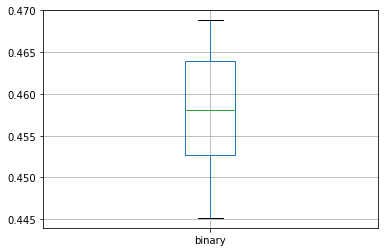

Epoch 1/50
59/59 - 3s - loss: 0.7068 - accuracy: 0.4935
Epoch 2/50
59/59 - 2s - loss: 0.5465 - accuracy: 0.8105
Epoch 3/50
59/59 - 2s - loss: 0.2770 - accuracy: 0.9123
Epoch 4/50
59/59 - 2s - loss: 0.1055 - accuracy: 0.9844
Epoch 5/50
59/59 - 2s - loss: 0.0511 - accuracy: 0.9935
Epoch 6/50
59/59 - 2s - loss: 0.0234 - accuracy: 0.9984
Epoch 7/50
59/59 - 2s - loss: 0.0131 - accuracy: 1.0000
Epoch 8/50
59/59 - 2s - loss: 0.0086 - accuracy: 0.9995
Epoch 9/50
59/59 - 2s - loss: 0.0061 - accuracy: 1.0000
Epoch 10/50
59/59 - 2s - loss: 0.0046 - accuracy: 0.9995
Epoch 11/50
59/59 - 2s - loss: 0.0034 - accuracy: 1.0000
Epoch 12/50
59/59 - 2s - loss: 0.0026 - accuracy: 1.0000
Epoch 13/50
59/59 - 2s - loss: 0.0021 - accuracy: 1.0000
Epoch 14/50
59/59 - 2s - loss: 0.0017 - accuracy: 1.0000
Epoch 15/50
59/59 - 2s - loss: 0.0013 - accuracy: 1.0000
Epoch 16/50
59/59 - 2s - loss: 0.0011 - accuracy: 1.0000
Epoch 17/50
59/59 - 2s - loss: 9.1263e-04 - accuracy: 1.0000
Epoch 18/50
59/59 - 2s - loss: 7.812

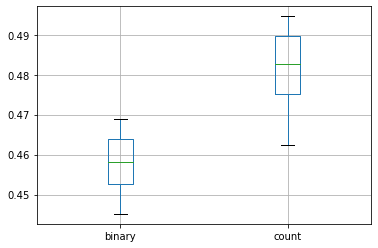

Epoch 1/50
59/59 - 3s - loss: 0.7275 - accuracy: 0.4930
Epoch 2/50
59/59 - 3s - loss: 0.3325 - accuracy: 0.8967
Epoch 3/50
59/59 - 2s - loss: 0.1188 - accuracy: 0.9634
Epoch 4/50
59/59 - 2s - loss: 0.0310 - accuracy: 0.9935
Epoch 5/50
59/59 - 3s - loss: 0.0131 - accuracy: 0.9984
Epoch 6/50
59/59 - 2s - loss: 0.0066 - accuracy: 0.9995
Epoch 7/50
59/59 - 2s - loss: 0.0038 - accuracy: 1.0000
Epoch 8/50
59/59 - 2s - loss: 0.0028 - accuracy: 1.0000
Epoch 9/50
59/59 - 2s - loss: 0.0020 - accuracy: 1.0000
Epoch 10/50
59/59 - 2s - loss: 0.0015 - accuracy: 1.0000
Epoch 11/50
59/59 - 2s - loss: 0.0011 - accuracy: 1.0000
Epoch 12/50
59/59 - 2s - loss: 8.6436e-04 - accuracy: 1.0000
Epoch 13/50
59/59 - 2s - loss: 7.0148e-04 - accuracy: 1.0000
Epoch 14/50
59/59 - 2s - loss: 5.7355e-04 - accuracy: 1.0000
Epoch 15/50
59/59 - 2s - loss: 4.8122e-04 - accuracy: 1.0000
Epoch 16/50
59/59 - 2s - loss: 4.0355e-04 - accuracy: 1.0000
Epoch 17/50
59/59 - 2s - loss: 3.6556e-04 - accuracy: 1.0000
Epoch 18/50
59/5

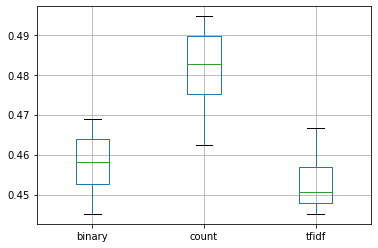

Epoch 1/50
59/59 - 2s - loss: 0.6934 - accuracy: 0.4989
Epoch 2/50
59/59 - 2s - loss: 0.6920 - accuracy: 0.5231
Epoch 3/50
59/59 - 2s - loss: 0.6893 - accuracy: 0.6243
Epoch 4/50
59/59 - 2s - loss: 0.6834 - accuracy: 0.7966
Epoch 5/50
59/59 - 2s - loss: 0.6741 - accuracy: 0.7740
Epoch 6/50
59/59 - 2s - loss: 0.6615 - accuracy: 0.9101
Epoch 7/50
59/59 - 2s - loss: 0.6458 - accuracy: 0.8945
Epoch 8/50
59/59 - 2s - loss: 0.6266 - accuracy: 0.8617
Epoch 9/50
59/59 - 2s - loss: 0.6066 - accuracy: 0.9101
Epoch 10/50
59/59 - 2s - loss: 0.5840 - accuracy: 0.9322
Epoch 11/50
59/59 - 2s - loss: 0.5598 - accuracy: 0.9537
Epoch 12/50
59/59 - 2s - loss: 0.5369 - accuracy: 0.9290
Epoch 13/50
59/59 - 2s - loss: 0.5103 - accuracy: 0.9575
Epoch 14/50
59/59 - 2s - loss: 0.4857 - accuracy: 0.9656
Epoch 15/50
59/59 - 2s - loss: 0.4600 - accuracy: 0.9731
Epoch 16/50
59/59 - 2s - loss: 0.4363 - accuracy: 0.9677
Epoch 17/50
59/59 - 2s - loss: 0.4140 - accuracy: 0.9736
Epoch 18/50
59/59 - 2s - loss: 0.3896 - 

In [ ]:
y_train[y_train>=0] = 1
y_train[y_train<0] = 0

y_test[y_test>=0] = 1
y_test[y_test<0] = 0
modes = ['binary', 'count', 'tfidf', 'freq']
print(y_train)
results = DataFrame()
for mode in modes:
    Xtrain, Xtest = prepare_data(X_train['News'], X_test['News'], mode)
     # prepare data for mode
    #print(Xtrain)
    results[mode] = evaluate_mode(Xtrain, y_train, Xtest, y_test)
 # summarize results
    print(results.describe())
 # plot results
    results.boxplot()
    pyplot.show()